# Testing GraphSearch Distance Concepts

## Load Libraries

In [41]:
import srex
import operator
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Initialize some variables

In [42]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one

In [43]:
newStopWords = get_stop_words('en') # a big one

In [44]:
stop_words_list.extend(newStopWords) # all together

In [45]:
query                  = 'internet of things'
reference_term         = 'iot'
nr_search_results      = 10

ranking_weight_type    = 'none' # it can be: 'none', 'linear' or 'inverse'
limit_distance         = 4 
sumarize               = 'none' 
include_reference_term = False
nr_of_graph_terms      = 5


In [46]:
# Articulo de revista científica IEEE Explore
#doc = srex.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore CON ponderación de documentos
results = srex.get_ieee_explore_ranking(query, nr_search_results)

# Ranking de documentos de IEEE Explore SIN ponderación de documentos
#results = srex.get_ieee_explore_ranking("search engine", 10)

In [29]:
#results
#stop_words_list
#doc_list = srex.get_ranking_as_list(results, ['title','abstract'])
#doc_list

In [47]:
doc_weighted = srex.get_ranking_as_string(results, ranking_weight_type)
#doc_weighted

In [48]:
sentences_list = doc_weighted.split('.')

## Text transformations

Remove stopwords, punctuation, stemming, lematization

In [49]:
processed_sentences_list = list(map(lambda x: srex.text_transformations(x, stop_words_list, lema=True, stem=False), sentences_list))
#processed_sentences_list

In [33]:
#Testing
#positions_dict = srex.get_term_positions_dict(processed_sentences_list[34])
#positions_dict

## Calculate word positions

In [50]:
doc_pos_matrix = srex.get_documents_positions_matrix(processed_sentences_list)
#doc_pos_matrix
#len(doc_pos_matrix)

## Calculate vecinity matrix

In [51]:
vecinity_matrix = srex.get_vecinity_matrix(doc_pos_matrix, reference_term, limit_distance, sumarize, include_reference_term)
vecinity_matrix
#len(vecinity_matrix)

[{},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {'lightweight': [4],
  'trustworthy': [3],
  'authentication': [2],
  'scheme': [1],
  'application': [1]},
 {'revolution': [4],
  'numerous': [3],
  'internet': [2],
  'thing': [1],
  'application': [1],
  'flood': [2],
  'monitoring': [3],
  'wildfire': [4]},
 {'enhance': [4],
  'communication': [3],
  'metric': [2],
  'employed': [1],
  'appplication': [1]},
 {'however': [3],
  'integrated': [2],
  'technology': [1],
  'application': [1],
  'suffers': [2],
  'many': [3],
  'challenge': [4]},
 {'key': [4],
  'exchange': [3],
  'authentication': [2, 4],
  'model': [1],
  'application': [1],
  'resolve': [2],
  'd2d': [3]},
 {},
 {'network': [4],
  'architecture': [3],
  'consists': [2],
  'uavs': [1],
  'device': [1],
  'micro': [2],
  'base': [3],
  'station': [4]},
 {},
 {},
 {},
 {},
 {'internet': [2],
  'thing': 

In [52]:
unique_vecinity_dict = srex.get_unique_vecinity_dict(vecinity_matrix)
unique_vecinity_dict

{'power': [4, 4],
 'enhance': [3, 4],
 'system': [2, 1, 1],
 'performance': [1],
 'network': [1, 1, 1, 1, 4],
 'reinforcement': [4],
 'learning': [3],
 'framework': [2],
 'enables': [1],
 'device': [1, 1, 1, 1, 1],
 'quickly': [2],
 'obtain': [3],
 'optimal': [4],
 'jammer': [3, 1],
 'channel': [4],
 'transmitting': [3],
 'fake': [2],
 'transmission': [1],
 'undermine': [2],
 'proposed': [3],
 'strategy': [2],
 'allows': [1],
 'able': [2],
 'defeat': [3, 4],
 'powerful': [4],
 'reactive': [3, 2],
 'jamming': [2],
 'attack': [1],
 'art': [4],
 'defeating': [3],
 'targeted': [4],
 'generation': [3],
 'cryptographic': [2],
 'key': [1, 4],
 'wearable': [1],
 'platform': [2],
 'centralized': [4],
 'security': [1, 1],
 'play': [4],
 'important': [3],
 'role': [2],
 'insurability': [2],
 'distributed': [3],
 'interaction': [4],
 'among': [3],
 'apt': [2],
 'attacker': [1],
 'defender': [1],
 'cyber': [2, 3, 2],
 'insurance': [3],
 'insurer': [4],
 'systemic': [4],
 'risk': [2, 1],
 'interconn

In [53]:
terms_freq_dict = {k: len(v) for k, v in unique_vecinity_dict.items()}
terms_freq_dict

{'power': 2,
 'enhance': 2,
 'system': 3,
 'performance': 1,
 'network': 5,
 'reinforcement': 1,
 'learning': 1,
 'framework': 1,
 'enables': 1,
 'device': 5,
 'quickly': 1,
 'obtain': 1,
 'optimal': 1,
 'jammer': 2,
 'channel': 1,
 'transmitting': 1,
 'fake': 1,
 'transmission': 1,
 'undermine': 1,
 'proposed': 1,
 'strategy': 1,
 'allows': 1,
 'able': 1,
 'defeat': 2,
 'powerful': 1,
 'reactive': 2,
 'jamming': 1,
 'attack': 1,
 'art': 1,
 'defeating': 1,
 'targeted': 1,
 'generation': 1,
 'cryptographic': 1,
 'key': 2,
 'wearable': 1,
 'platform': 1,
 'centralized': 1,
 'security': 2,
 'play': 1,
 'important': 1,
 'role': 1,
 'insurability': 1,
 'distributed': 1,
 'interaction': 1,
 'among': 1,
 'apt': 1,
 'attacker': 1,
 'defender': 1,
 'cyber': 3,
 'insurance': 1,
 'insurer': 1,
 'systemic': 1,
 'risk': 2,
 'interconnected': 1,
 'mechanism': 1,
 'mitigate': 1,
 'achieving': 1,
 'perfect': 1,
 'often': 1,
 'impossible': 1,
 'internet': 3,
 'thing': 3,
 'highly': 1,
 'vulnerable': 1

In [61]:
foo = srex.normalize_dictionary_values(terms_freq_dict, [1,20])
type(foo["power"])
#foo

float

In [55]:
sorted_terms_freq_dict = sorted(terms_freq_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_terms_freq_dict

[('network', 20.0),
 ('device', 20.0),
 ('application', 15.25),
 ('system', 10.5),
 ('cyber', 10.5),
 ('internet', 10.5),
 ('thing', 10.5),
 ('data', 10.5),
 ('authentication', 10.5),
 ('power', 5.75),
 ('enhance', 5.75),
 ('jammer', 5.75),
 ('defeat', 5.75),
 ('reactive', 5.75),
 ('key', 5.75),
 ('security', 5.75),
 ('risk', 5.75),
 ('many', 5.75),
 ('performance', 1.0),
 ('reinforcement', 1.0),
 ('learning', 1.0),
 ('framework', 1.0),
 ('enables', 1.0),
 ('quickly', 1.0),
 ('obtain', 1.0),
 ('optimal', 1.0),
 ('channel', 1.0),
 ('transmitting', 1.0),
 ('fake', 1.0),
 ('transmission', 1.0),
 ('undermine', 1.0),
 ('proposed', 1.0),
 ('strategy', 1.0),
 ('allows', 1.0),
 ('able', 1.0),
 ('powerful', 1.0),
 ('jamming', 1.0),
 ('attack', 1.0),
 ('art', 1.0),
 ('defeating', 1.0),
 ('targeted', 1.0),
 ('generation', 1.0),
 ('cryptographic', 1.0),
 ('wearable', 1.0),
 ('platform', 1.0),
 ('centralized', 1.0),
 ('play', 1.0),
 ('important', 1.0),
 ('role', 1.0),
 ('insurability', 1.0),
 ('dis

In [56]:
first_sorted_terms_freq_dict = {k: v for k, v in list(sorted_terms_freq_dict)[:nr_of_graph_terms]}
first_sorted_terms_freq_dict

{'network': 20.0,
 'device': 20.0,
 'application': 15.25,
 'system': 10.5,
 'cyber': 10.5}

In [58]:
most_freq_distance_dict = {k: {'frequency':terms_freq_dict[k], 'distance':srex.np.median(unique_vecinity_dict[k])} for k in first_sorted_terms_freq_dict.keys()}

In [20]:
most_freq_distance_dict

{'network': {'frequency': 20.0, 'distance': 1.0},
 'device': {'frequency': 20.0, 'distance': 1.0},
 'application': {'frequency': 15.25, 'distance': 1.0},
 'system': {'frequency': 10.5, 'distance': 1.0},
 'internet': {'frequency': 10.5, 'distance': 2.0}}

In [21]:
graph = srex.getGraphViz(reference_term, most_freq_distance_dict, '0.7', 'deepskyblue')

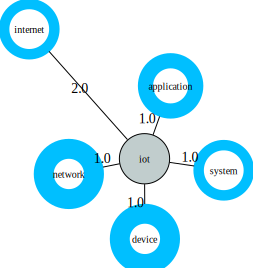

In [22]:
graph